https://github.com/neowizard2018/neowizard/tree/master/DeepLearningProject

# 모델 다운로드 및 살펴보기

In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO # YOLO 함수 다운로드

model = YOLO('yolov8n.pt')  # yolov8n.pt다운로드함(yolo8n / yolo8m / yolo8l / yolo8x 등이 있고, 우측으로 갈수록 인식 성능 우수)

https://cocodataset.org/#overview

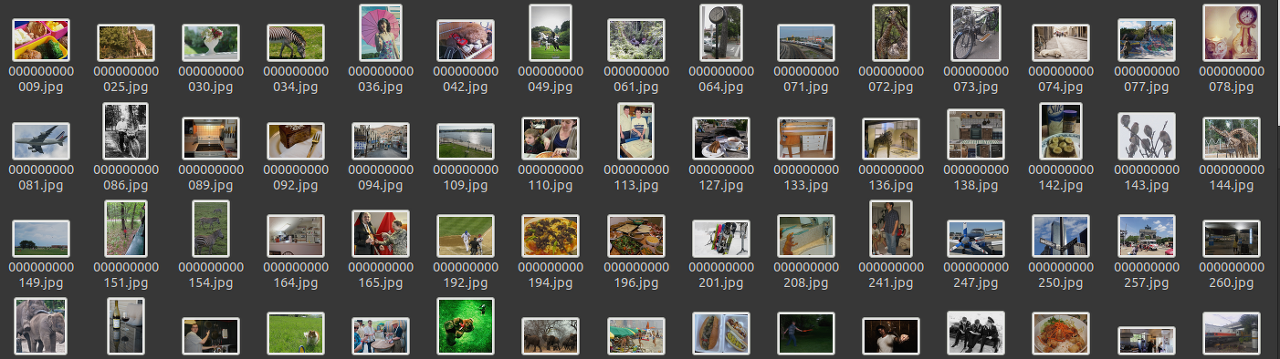

In [ ]:
print(type(model.names))
print(model.names)
print(len(model.names))

<class 'dict'>
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phon

# YOLOv8의 이미지 인식 테스트

## 테스트 이미지 다운로드
> ! : 파이썬에서 유닉스(리눅스)의 명령어를 사용할 수 있도록 해주는 명령어  
> wget : (유닉스(리눅스) 명령어)인터넷에서 파일을 다운로드 할 수 있게 해주는 리눅스 명령어

In [ ]:
!wget -q 'https://github.com/ygcho-git/basic_AI/raw/main/dataset/yolo8_test1.jpg'
!wget -q 'https://github.com/ygcho-git/basic_AI/raw/main/dataset/yolo8_test2.jpg'
!wget -q 'https://github.com/ygcho-git/basic_AI/raw/main/dataset/yolo8_test3.jpg'
!wget -q 'https://github.com/ygcho-git/basic_AI/raw/main/dataset/yolo8_test4.jpg'

## 모델로 예측해 보기

In [ ]:
# 이미지 보여주기
import matplotlib.pyplot as plt

image = plt.imread('/content/yolo8_test1.jpg') # 그림 불러오기(이미지를 numpy 배열로)
plt.imshow(image) # imshow() : 숫자 배열을 이미지로 출력

plt.show()

In [ ]:
# 이미지 예측하기 : predict()
# 예측한 결과는 results 변수에 할당
results = model.predict(source='/content/yolo8_test1.jpg', save=True)

In [ ]:
# 예측한 그림은 /content/runs/detect/predict/ 디렉토리에 저장됨.

image = plt.imread('/content/runs/detect/predict/yolo8_test1.jpg') # 그림 불러오기
plt.imshow(image)

plt.show()

## 예측결과에서 필요한 정보 추출하기

In [ ]:
print(type(results))
print(results)

In [ ]:
results[0].boxes

In [ ]:
print("종합 : ", results[0].boxes[0]) # 마우스의 종합 정보
print("클래스 : ", results[0].boxes[0].cls) # pytorch 텐서
print("클래스 : ", results[0].boxes[0].cls.tolist()) # pytorch 텐서 --> 파이썬 리스트로 형변환
print("클래스 : ", results[0].boxes[0].cls.tolist()[0]) # 파이썬 리스트의 0번 원소

In [ ]:
cls_dict = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
cls_num = int(results[0].boxes[0].cls.tolist()[0])

print(cls_dict[cls_num])

In [ ]:
cls_dict = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
cls_num = int(results[0].boxes[0].cls.tolist()[0])
print("판정 :", cls_dict[cls_num])

conf = results[0].boxes[0].conf.tolist()[0] # 확신 정확도
print("확신 :", conf)

xywh = results[0].boxes[0].xywh.tolist()
print("위치크기1 :", xywh)

xywhn = results[0].boxes[0].xywhn.tolist()
print("위치크기2 :", xywhn)

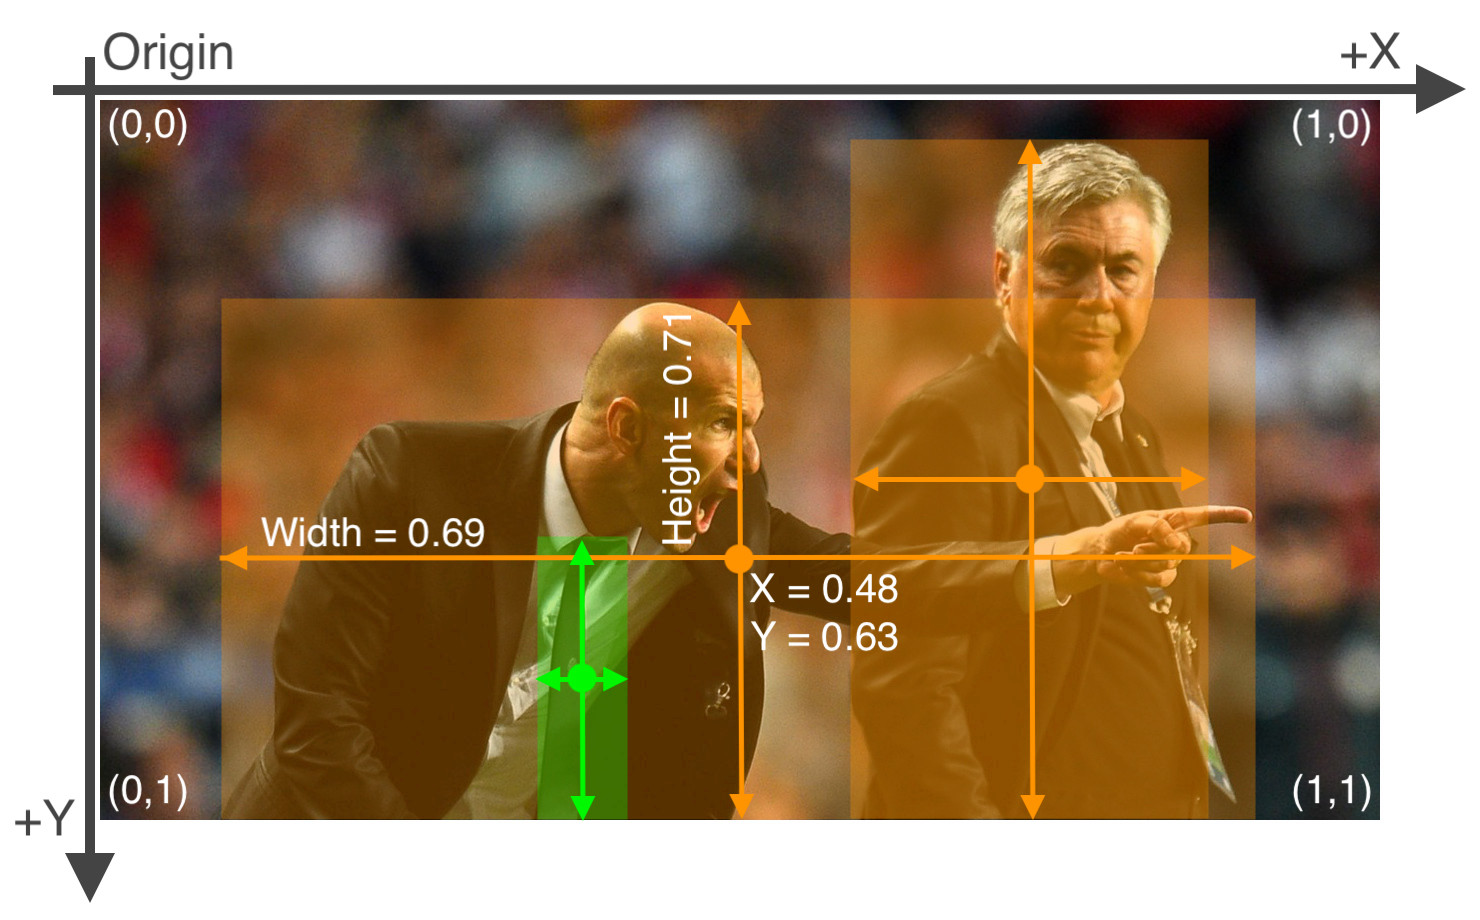

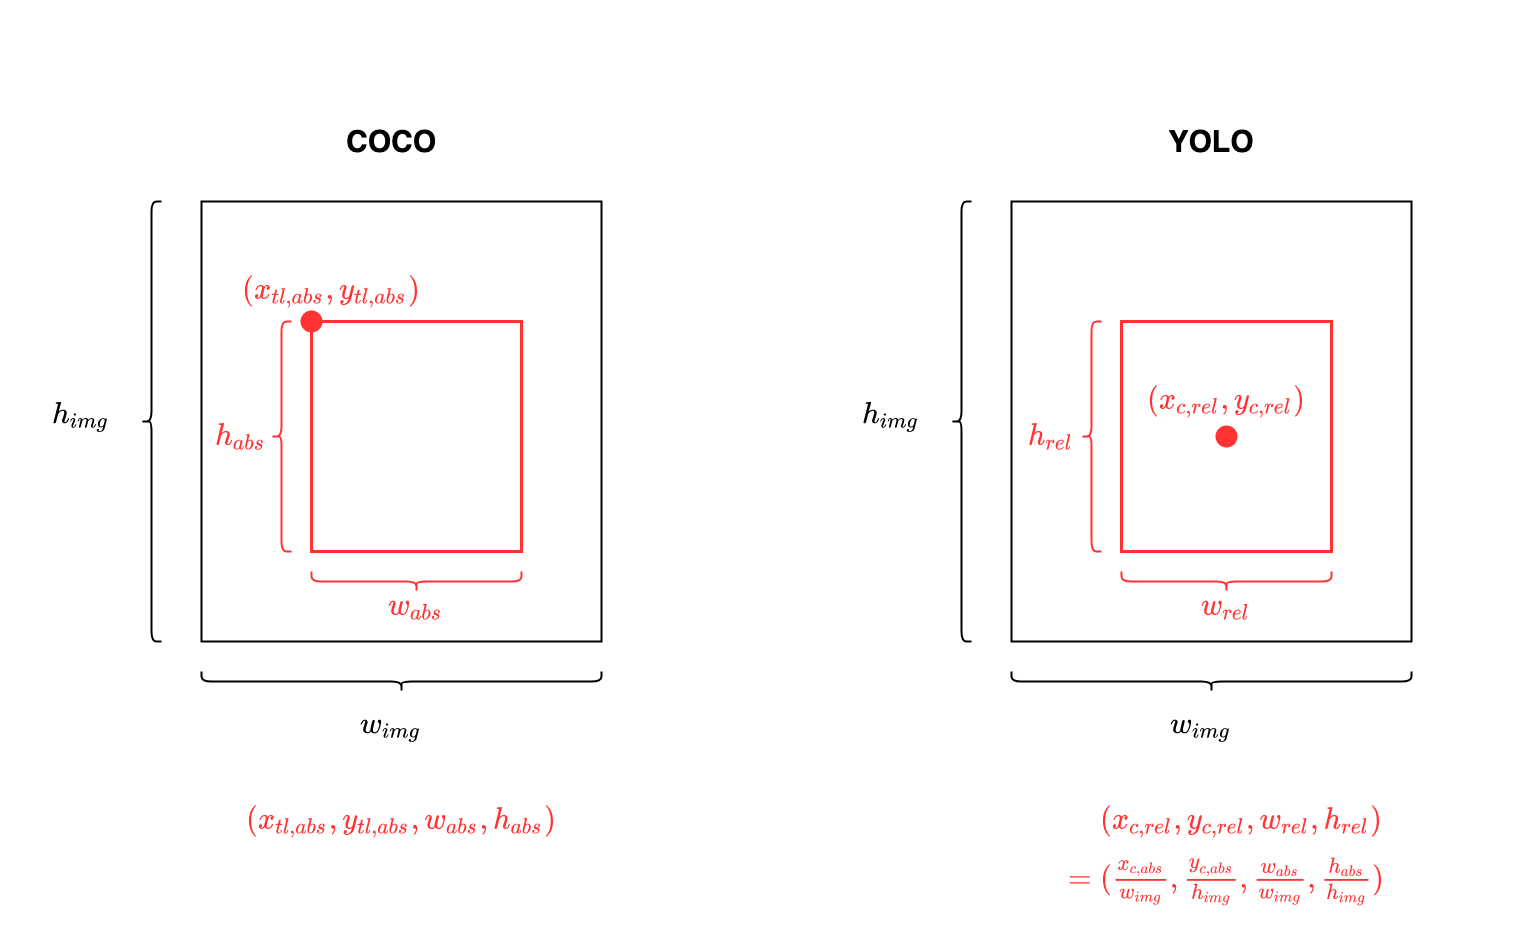

# Aquarium Dataset(Custom Data)를 활용해 YOLO 모델 개발하기

## 데이터 준비하기

Aquarium Dataset (custom data) 다운로드  
Public Dataset : https://public.roboflow.com/object-detection/aquarium/2

In [ ]:
!wget -O Aquarium_Data.zip  https://public.roboflow.com/ds/FAgqOgdewl?key=1uz2izrHYH

In [ ]:
import zipfile

with zipfile.ZipFile('/content/Aquarium_Data.zip') as target_file:
    target_file.extractall('/content/Aquarium_Data/')

## data.yaml 파일 필요
data.yaml 파일 안에는 아래와 같은 필수정보가 포함되어야 함

1. 데이터셋이 저장된 위치 train: /xxx/train/images ...
2. 클래스의 개수 nc :  
3. 클래스 names: [...]

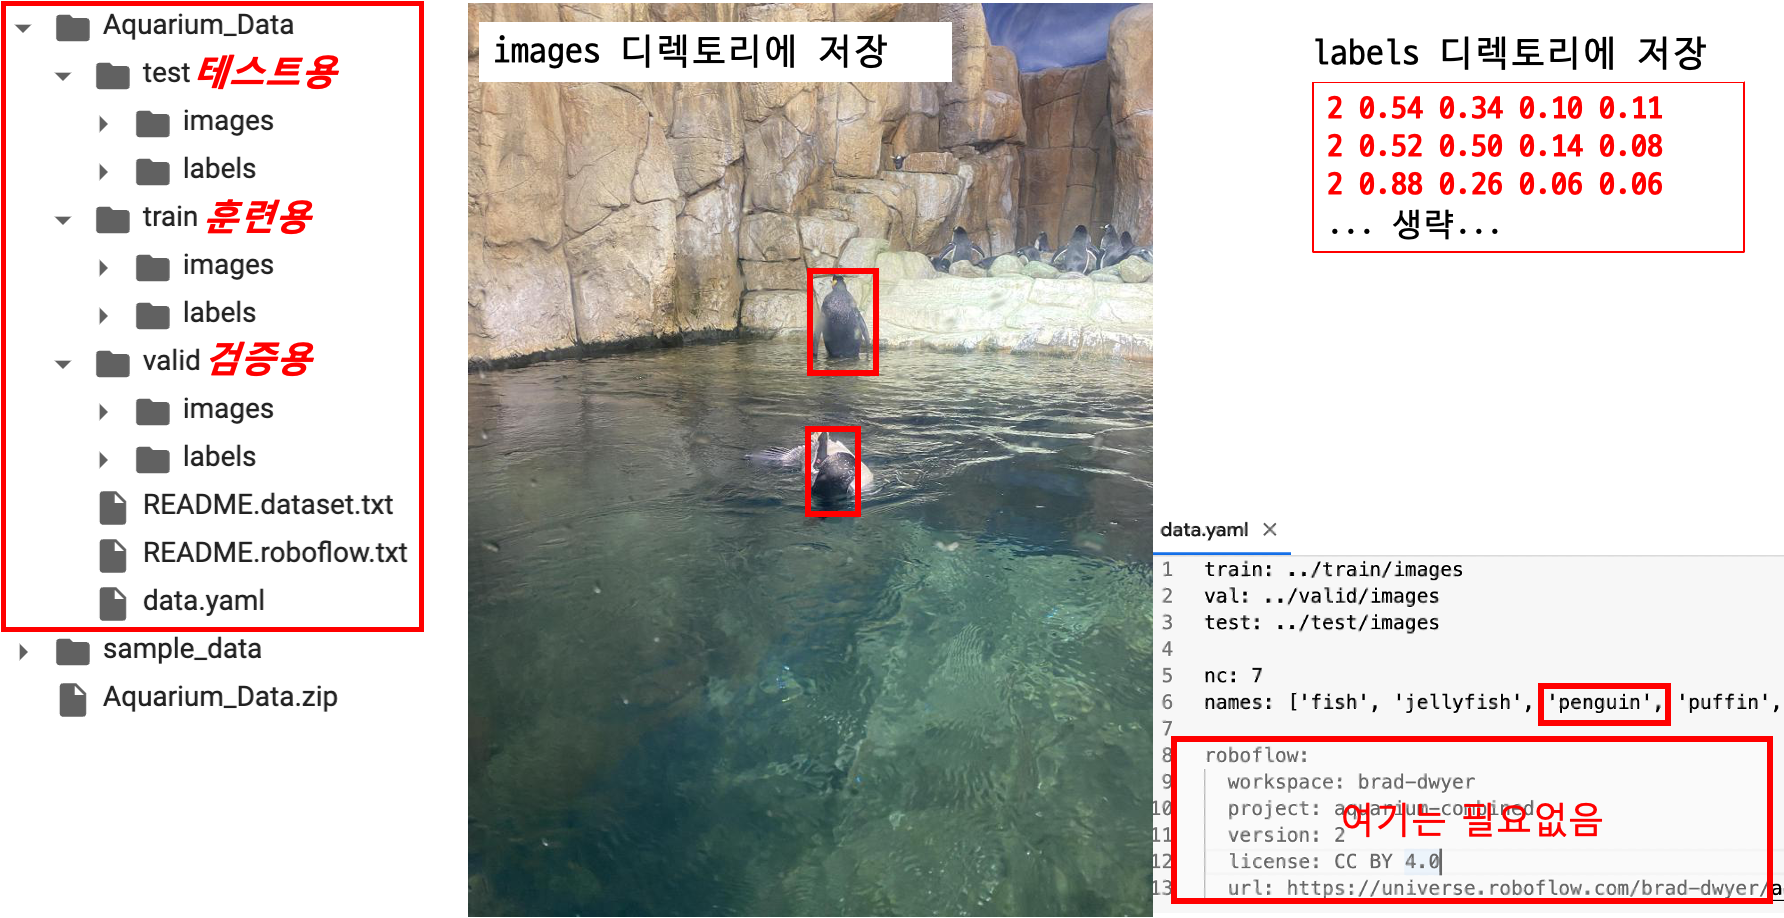

In [ ]:
!cat /content/Aquarium_Data/data.yaml

In [ ]:
pip install PyYAML

In [ ]:
# yaml 파일을 학습이 가능하도록 경로 설정.
# key-value 데이터인 dict 데이터타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# 가장 중요한 부분은 데이터 경로 설정임.

import yaml

data = { 'train' : '/content/Aquarium_Data/train/images/',
         'val' : '/content/Aquarium_Data/valid/images/',
         'test' : '/content/Aquarium_Data/test/images',
         'names' : ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
         'nc' : 7 }

with open('/content/Aquarium_Data/Aquarium_Data.yaml', 'w') as f:
  yaml.dump(data, f)


with open('/content/Aquarium_Data/Aquarium_Data.yaml', 'r') as f:
  aquarium_yaml = yaml.safe_load(f)
  display(aquarium_yaml)

## 이미 학습된 모델 다운받기(coco data set으로 학습된)

In [ ]:
pip install ultralytics

In [ ]:
# Load YOLOv8n

from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model

## 아쿠아리움 데이터셋으로 학습시키기

In [ ]:
model.train(data='/content/Aquarium_Data/Aquarium_Data.yaml', epochs=100, patience=30, batch=32, imgsz=416)

## 모델 활용하기

In [ ]:
# 이미지 예측하기 : predict()
# 예측한 결과는 results 변수에 저장
results = model.predict(source='??????????????', save=True)